In [1]:
import numpy as np #para manejo de vectores
import matplotlib.pyplot as plt #para gráficas
import math # para operaciones matemáticas
import random #para números aleatorios

Valores iniciales:
Los vectores son de dimensión $dim = 10$

El dominio de cada coordenada es $[xmin,xmax] = [-10,10]$

La población inicial es de 100 individuos

Se generan vectores de manera aleatoria uniforme, considerando el artículo de Ono acerca de UNDX, el valor de la varianza para el eje principal es 
$$\sigma^2_\xi=\frac{1}{4}$$ 
y para el espacio ortogonal: 
$$\sigma^2_\eta=\frac{2}{3(n-1)} =  \frac{2}{9}$$ 

pues $n=dim =10$. 

Este es un algoritmo genético que sigue la propuesta de Ono: 
* Generar de manera aleatoria vectores de dimensión 10
* Elegir dos individuos de manera aleatoria sin reemplazo
* Generar decendencia aplicando UNDX a los individuos elegidos, se repite este proceso $n_c$ veces para crear $2\times n_c$ decendientes
* Sobreviven dos individuos de la familia que contiene a los padres y su decendencia; uno es el mejor individuo y el otro es elegido mediante ruleta. Los elementos reemplazan a los padres en la población
* Se repiten los pasos anteriores hasta algún criterio de paro



In [2]:
dim = 10
xmin = -10
xmax = 10

vareta = 0.074
varxi = 0.25

pobsize = 150
n_c = 15
maxiter = 5000

In [3]:
########### Norma de un vector para ahorrar notación #################
def norma(v):
    return np.linalg.norm(v)

In [4]:
############ Generar vectores n dimensionales de manera aleatoria uniforme ##############
def create_pob(pobsize):
    pob = []
    for i in range(pobsize):
        vector = []
        for j in range(dim):
            x = random.uniform(-10,10)
            vector.append(x)            
        vector = np.array(vector)
        pob.append(vector)
    return pob           

In [5]:
########## Función fitness a optimizar, hallar mínimo en este caso ###########
def aptitud(x):
    return np.sum(x**2)

In [6]:
##############################################################
# Calcula el complemento ortogonal de un vector              #
# El resultado es una base de n-1 elementos de dimension n   #
##############################################################
def orthogonal_vectors(base_vector, num_vectors = dim -1):
    vectors = []
    while len(vectors) < num_vectors:
        vec = np.random.rand(dim)
        for v in vectors + [base_vector]:
            epsilon = 1e-8  #np batalla para dividir entre números pequeños
            vec -= np.dot(vec, v) / (np.dot(v, v) + epsilon) * v #sumo un número pequeño para evitar errores
        if norma(vec) > 1e-5:  
            vectors.append(vec / norma(vec))  
    return np.array(vectors)

In [7]:
##############################################
# Genera el elemento del espacio ortogonal   #
# usando la varianza teorica                 #
##############################################

def gen_corth(base):
    vect = 0
    for i in base:
        etai = np.random.normal(0,np.sqrt(vareta))
        vect += etai * i
    return vect

In [8]:
###############################################################
# Segun ono sobrevive el mejor y el que gane                  #
# ruleta, la ruleta esta basada en la aptitud                 #
# como se intenta minimizar tomo el inverso multiplicativo    #
# para que la menor aptitud tenga mayor probabilidad          #
# de ser elegida                                              #
###############################################################
def survival_selection(family):
    best = min(family, key=lambda individual: aptitud(individual))
    weights = [1.0 / (aptitud(ind) + 1e-6) for ind in family]  
    roulette_selection = random.choices(family, weights=weights, k=1)[0]
    return best, roulette_selection


In [9]:
#################################################################
# Operador undx, recibe a la población y arroja a la población  #
# con el reemplazo hecho por la ruleta  y el mejor              #
#################################################################
def undx(pob, n_c):
    epsilon = 1e-8
    padres = random.sample(pob, 3)
    x1, x2, x3 = padres
    xp = 0.5 * (x2 + x1)
    d = x2 - x1
    offspring = []

    for _ in range(n_c):
        x31 = x3 - x1
        x21 = x2 - x1
        D = math.sqrt(norma(x31)**2 * (1 - (np.dot(x31, x21) / (norma(x31) * norma(x21) + epsilon))**2))
        orth_vects = orthogonal_vectors(d, num_vectors=dim-1)
        comp_orth = gen_corth(orth_vects)
        xi = np.random.normal(0, np.sqrt(varxi))
        x_c = xp + xi * d + comp_orth
        x_c2 = xp - xi * d - comp_orth
        offspring.extend([x_c, x_c2])


    family = [x1, x2, x3] + offspring
    best, roulette = survival_selection(family)

    for idx in range(len(pob)):
        if np.array_equal(pob[idx], x1):
            pob[idx] = best
            break

    for idx in range(len(pob)):
        if np.array_equal(pob[idx], x2):
            pob[idx] = roulette
            break

    sorted_pob = sorted(pob, key=lambda individual: aptitud(individual))

    return sorted_pob

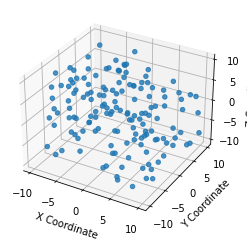

In [10]:
inpob = create_pob(pobsize)
x = np.array([arr[0] for arr in inpob])
y = np.array([arr[1] for arr in inpob])
z = np.array([arr[2] for arr in inpob])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(x, y, z, alpha =0.8)

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')

plt.show()

In [11]:
resultados= []
for i in range(maxiter):
    inpob = undx(inpob, n_c)
    #print(f"generación {i+1} tiene como mejor aptitud {aptitud(inpob[0])}")
    resultados.append(aptitud(inpob[0]))

In [12]:
print(aptitud(inpob[0]))

0.03362340774152594


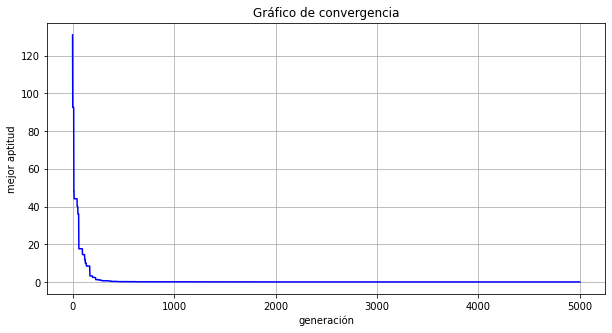

In [13]:
plt.figure(figsize=(10, 5))  # Crea una figura con un tamaño específico
plt.plot(resultados,  linestyle='-', color='b')
plt.title('Gráfico de convergencia')  
plt.xlabel('generación')  
plt.ylabel('mejor aptitud')  
plt.grid(True)

plt.show()

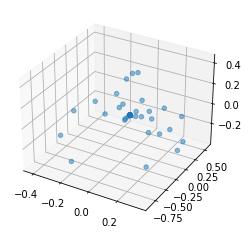

In [14]:
x = np.array([arr[0] for arr in inpob])
y = np.array([arr[1] for arr in inpob])
z = np.array([arr[2] for arr in inpob])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(x, y, z, alpha = 0.5)
plt.show()

<IPython.core.display.Javascript object>


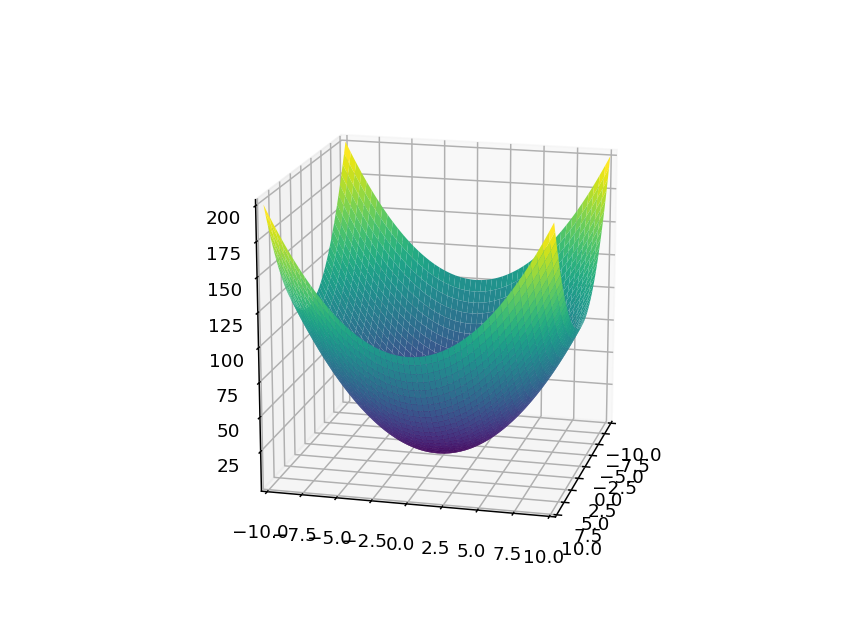

In [15]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D


def funcion(x, y):
    return x**2 + y**2


x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)
Z = funcion(X, Y)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')


ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([np.min(Z), np.max(Z)])


ax.set_box_aspect([1,1,1])  


plt.show()
